In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("german_credit.csv")
data

,Checking Status,Duration,Credit Amount,Present Employment Tenure,Installment Rate,Residence Tenure,Age,Existing credit,Job type,Number of dependents,...,Sex/Marital status_A94,Guarantors_A102,Guarantors_A103,Property_A122,Property_A123,Property_A124,Other installment plans_A142,Other installment plans_A143,Rent or own housing_A152,Rent or own housing_A153
0,0.0,6,1169,4.0,4,4,67,2,2.0,1,...,False,False,False,False,False,False,False,True,True,False
1,1.0,48,5951,2.0,2,2,22,1,2.0,1,...,False,False,False,False,False,False,False,True,True,False
2,3.0,12,2096,3.0,2,3,49,1,1.0,2,...,False,False,False,False,False,False,False,True,True,False
3,0.0,42,7882,3.0,2,4,45,1,2.0,2,...,False,False,True,True,False,False,False,True,False,True
4,0.0,24,4870,2.0,3,4,53,2,2.0,2,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12,1736,3.0,3,4,31,1,1.0,1,...,False,False,False,False,False,False,False,True,True,False
996,0.0,30,3857,2.0,4,4,40,1,3.0,1,...,False,False,False,True,False,False,False,True,True,False
997,3.0,12,804,4.0,4,4,38,1,2.0,1,...,False,False,False,False,True,False,False,True,True,False
998,0.0,45,1845,2.0,4,4,23,1,2.0,1,...,False,False,False,False,False,True,False,True,False,True


In [4]:
data.describe()

,Checking Status,Duration,Credit Amount,Present Employment Tenure,Installment Rate,Residence Tenure,Age,Existing credit,Job type,Number of dependents,Has phone,Foreign,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,3271.258000,2.384000,2.973000,2.845000,35.546000,1.407000,1.904000,1.155000,0.404000,0.037000,0.300000
std,1.257638,12.058814,2822.736876,1.208306,1.118715,1.103718,11.375469,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,250.000000,0.000000,1.000000,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,2.000000,27.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2319.500000,2.000000,3.000000,3.000000,33.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,24.000000,3972.250000,4.000000,4.000000,4.000000,42.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,18424.000000,4.000000,4.000000,4.000000,75.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


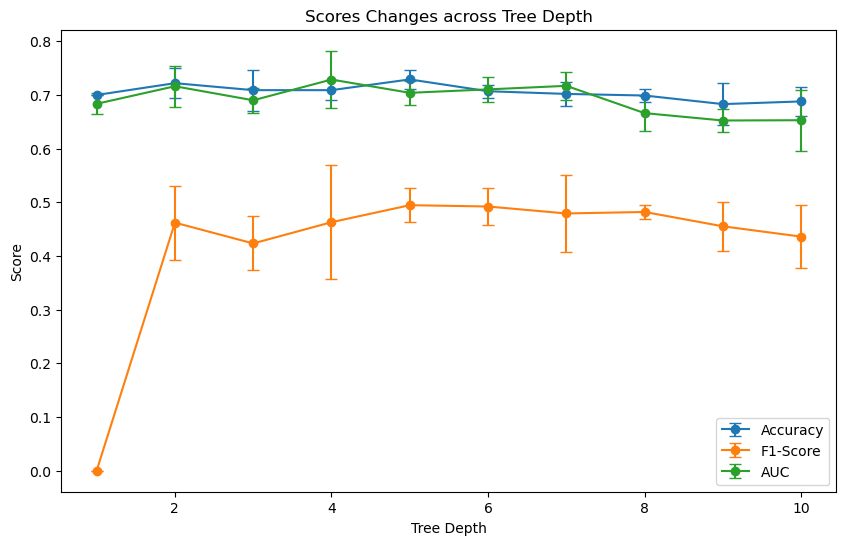

In [5]:
X = data.drop(columns=['target'])
y = data['target']

depth = range(1, 11)

avg_accuracy = []
avg_f1 = []
avg_auc = []
accuracy_error = []
f1_error = []
auc_error = []

# 5-fold CV
k_fold = StratifiedKFold(n_splits=5, shuffle=True)

for d in depth:
    
    clf = DecisionTreeClassifier(max_depth=d)
    
    accuracy_list = cross_val_score(clf, X, y, cv=k_fold, scoring='accuracy')
    f1_score_list = cross_val_score(clf, X, y, cv=k_fold, scoring='f1')
    auc_list = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
    
    # Get average performance metrics
    avg_accuracy.append(np.mean(accuracy_list))
    accuracy_error.append(np.std(accuracy_list))
    
    avg_f1.append(np.mean(f1_score_list))
    f1_error.append(np.std(f1_score_list))
    
    avg_auc.append(np.mean(auc_list))
    auc_error.append(np.std(auc_list))
   

# Plot results with error bars
plt.figure(figsize=(10, 6))

plt.errorbar(depth, avg_accuracy, yerr=accuracy_error, label='Accuracy', marker='o', capsize=4)
plt.errorbar(depth, avg_f1, yerr=f1_error, label='F1-Score', marker='o', capsize=4)
plt.errorbar(depth, avg_auc, yerr=auc_error, label='AUC', marker='o', capsize=4)

plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.title('Scores Changes across Tree Depth')
plt.legend()

plt.show()

I think AUC works better as a metric because in this setting, the data is quite imbalanced (only 30% of the target is 1) and we don't quite care about only capturing positive samples. Both negative samples and positive samples matter in credit problems. So accuracy and F1 scores are not good enough. The best depth should be 5. 

<h1>(b) Decision Tree Plotting <h1>

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}, Best accuracy:0.7248697916666667.
F1 Score on test set: 0.36666666666666664
Accuracy on test set: 0.62
AUC on test set: 0.5476190476190477


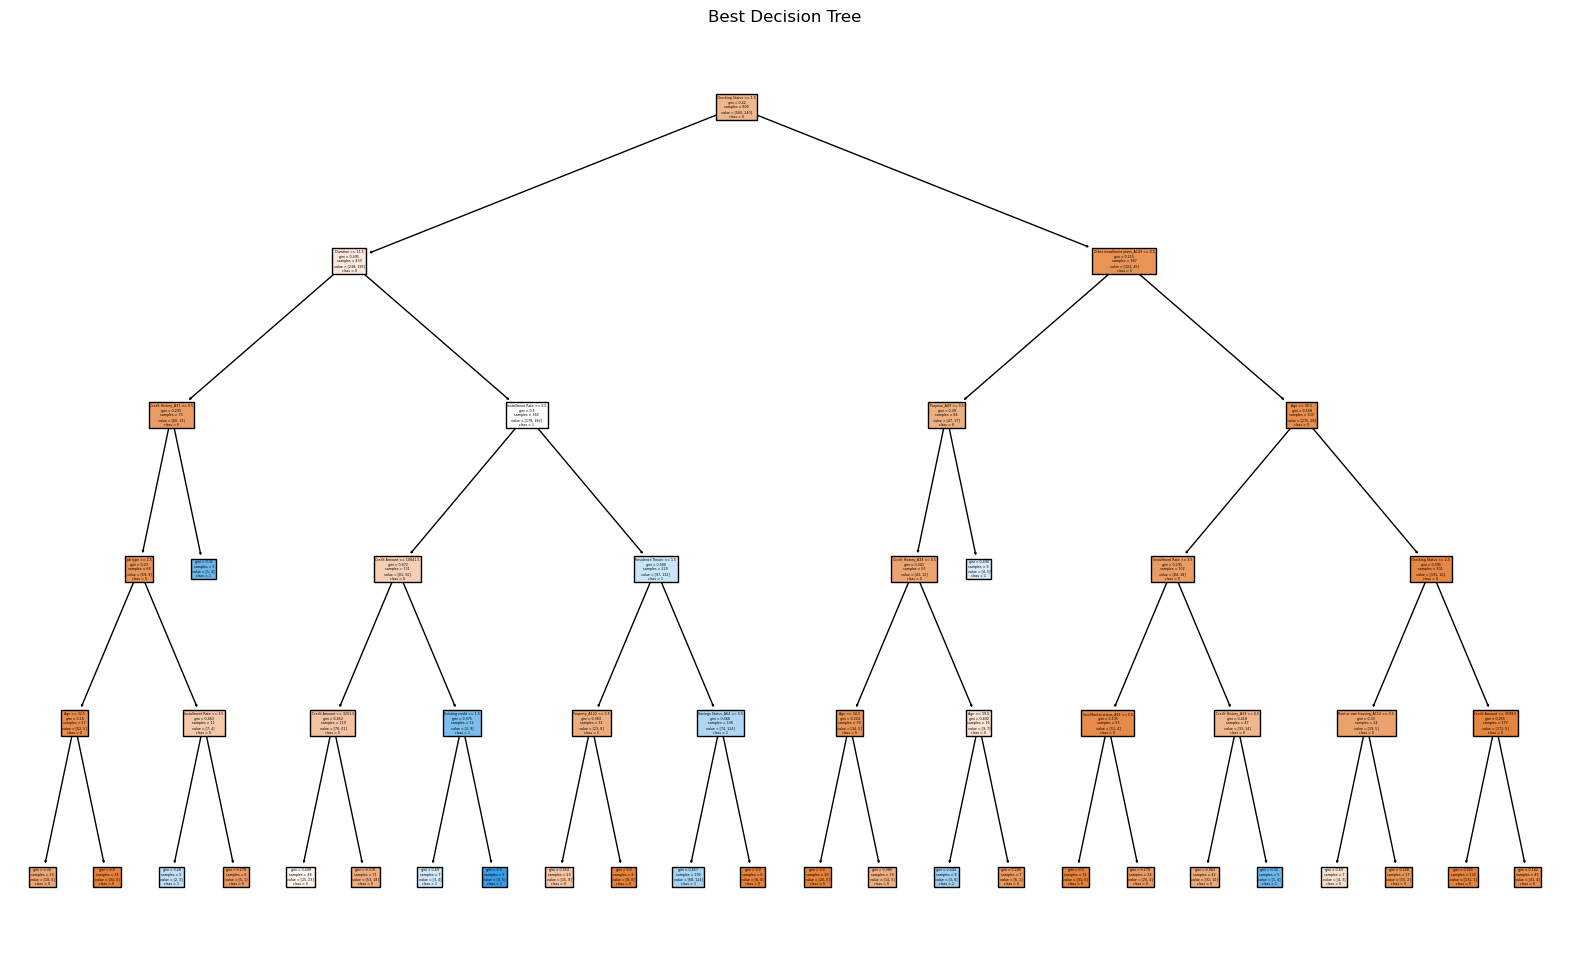

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

param = {
    'max_depth': range(5,11),
    'criterion': ['gini', 'log_loss', 'entropy'],
    'min_samples_leaf': range(1,6)
}

clf = DecisionTreeClassifier()

# Grid search with 5-fold cv
grid_search = GridSearchCV(clf, param, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Find the best model
best_model = grid_search.best_estimator_
best_param = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_param}, Best accuracy:{best_score}.")

# Train the best model and apply it to test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate metrics
F1_score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"F1 Score on test set: {F1_score}")
print(f"Accuracy on test set: {accuracy}")
print(f"AUC on test set: {auc}")

# Draw optimal tree
plt.figure(figsize=(20, 12))
plot_tree(best_model, filled=True, feature_names=X.columns.to_list(), class_names=['0', '1'])
plt.title("Best Decision Tree")
plt.show()

<h1>(c) GOSDT<h2>

In [7]:
from gosdt import GOSDT
from gosdt.model.threshold_guess import compute_thresholds

In [8]:
k_fold = StratifiedKFold(n_splits=5)

param = {
    "depth_list": [2, 3, 4, 5 ,6 , 7, 8, 9, 10],
    "regularization_list": [0.01, 0.05, 0.1]
}


avg_f1_score_list = []
avg_accuracy_list = []
avg_auc_list = []

n_est = 40
max_depth = 1
best_f1_score = 0
best_accuracy =0
best_auc = 0

for depth in param["depth_list"]:
    for regularization in param["regularization_list"]:
        f1_score_list, accuracy_list, auc_list = [], [], []
        for train_index, val_index in k_fold.split(X_train, y_train):
            X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
            
            X_train_guessed, thresholds, header, threshold_guess_time = compute_thresholds(X_t, y_t, n_est, max_depth)
    
            config={
                'regularization': regularization,
                'balance': True,
                'max_depth': depth,
                'time_limit': 60
            }
            
            gosdt = GOSDT(config)
            
            gosdt.fit(X_train_guessed, y_t)
            
            y_pred = gosdt.predict(X_val)
            # print(f"y_pred:{y_pred}")
    
            f1_score_list.append(f1_score(y_val, y_pred))
            accuracy_list.append(accuracy_score(y_val, y_pred))
            auc_list.append(roc_auc_score(y_val, y_pred))
            # print(f1_score_list)
            
        # Average performance across folds
        avg_f1_score = sum(f1_score_list) / len(f1_score_list)
        avg_accuracy = sum(accuracy_list) / len(accuracy_list)
        avg_auc = sum(auc_list) / len(auc_list)
        
        avg_f1_score_list.append(avg_f1_score)
        avg_accuracy_list.append(avg_accuracy)
        avg_auc_list.append(avg_auc)
    
        if avg_accuracy > best_accuracy:
            best_f1_score = avg_f1_score
            best_accuracy = avg_accuracy
            best_auc = avg_auc
            best_param = {
                "max_depth": depth,
                "regularization":regularization
            }

# Print cross-validation results
print(f"Best Parameters: {best_param}")
print(f"Average F1-score: {best_f1_score}, Accuracy: {best_accuracy}, AUC: {best_auc}")

best_config={
    'regularization': best_param["regularization"],
    'balance': True,
    'max_depth': best_param["max_depth"],
    'time_limit': 60
}

# Retrain on full training set with optimal parameters
best_model = GOSDT(best_config)
best_model.fit(X_train, y_train)

# Test the final model
y_test_pred = best_model.predict(X_test)
best_f1_score = f1_score(y_test, y_test_pred)
best_accuracy = accuracy_score(y_test, y_test_pred)
best_auc = roc_auc_score(y_test, y_test_pred)

# Report final performance
print(f"Test F1-score: {best_f1_score}, Accuracy: {best_accuracy}, AUC: {best_auc}")

gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=0 MB
bounds: [0.359286..0.359286] (0.000000) loss=0.339286, iterations=66
gosdt reported successful execution
training completed. 0.000/0.000/0.524 (user, system, wall), mem=0 MB
bounds: [0.328646..0.328646] (0.000000) loss=0.278646, iterations=45699
gosdt reported successful execution
training completed. 0.000/0.000/0.900 (user, system, wall), mem=0 MB
bounds: [0.343110..0.343110] (0.000000) loss=0.283110, iterations=69423
gosdt reported successful execution
training completed. 0.000/0.000/0.049 (user, system, wall), mem=0 MB
bounds: [0.326875..0.326875] (0.000000) loss=0.296875, iterations=5088
gosdt reported successful execution
training completed. 0.000/0.000/2.006 (user, system, wall), mem=0 MB
bounds: [0.355015..0.355015] (0.000000) loss=0.295015, iterations=126256
gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=0 MB
bounds: [0.43

Comparing by accuracy, GOSDT's performance is the best.